# 3. pandas로 데이터 시각화
## (1) pandas를 사용해 그래프 그리기
- `pandas` 라이브러리는 데이터 조작 및 분석을 위한 Python 라이브러리로, 기본적인 시각화 기능을 제공합니다.
- 내부적으로 `matplotlib`를 사용하여 시각화를 수행하며, DataFrame이나 Series 객체에서 직접 `.plot()` 메소드를 호출함으로써 다양한 차트를 생성할 수 있습니다.


In [2]:
import pandas as pd
import numpy as np
# !pip install matplotlib
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.7 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [3]:
# 임의의 데이터 생성
data = {
    'A': [1,2,3,4,5],
    'B': [1.2, 2.3, 3.4, 4.5, 5.6],
    'C': [9,1,2,7,4]
}
df = pd.DataFrame(data)

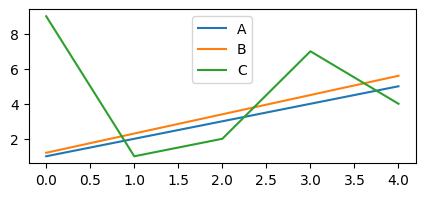

In [4]:
# 선 그래프
df.plot(figsize=(5,2))
plt.show()

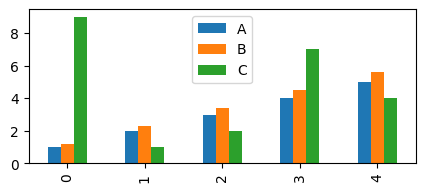

In [6]:
# 막대 그래프
df.plot(kind='bar', figsize=(5,2))
plt.show()

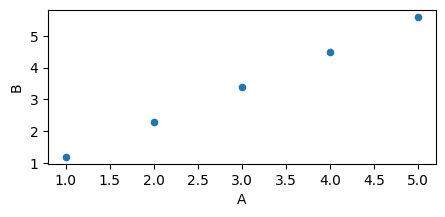

In [7]:
# 산점도
df.plot(kind='scatter', x='A', y='B', figsize=(5,2))
plt.show()

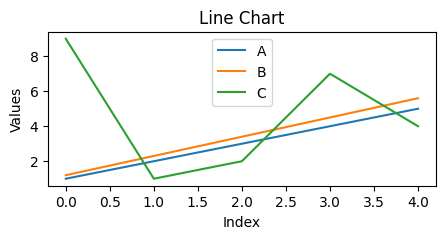

In [8]:
# 각 plot 메소드는 축 객체를 반환합니다. 이를 사용하여 더 세밀한 설정을 할 수 있습니다.
ax = df.plot(figsize=(5,2))
ax.set_title('Line Chart')
ax.set_xlabel('Index')
ax.set_ylabel('Values')
plt.show()

- 주가 데이터를 읽어와서 pandas로 그래프를 그리는 방법

In [5]:
df = pd.read_csv("../dataset/yfinance_aapl.csv", index_col=0)
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300
1,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200
2,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800


<Axes: xlabel='Date'>

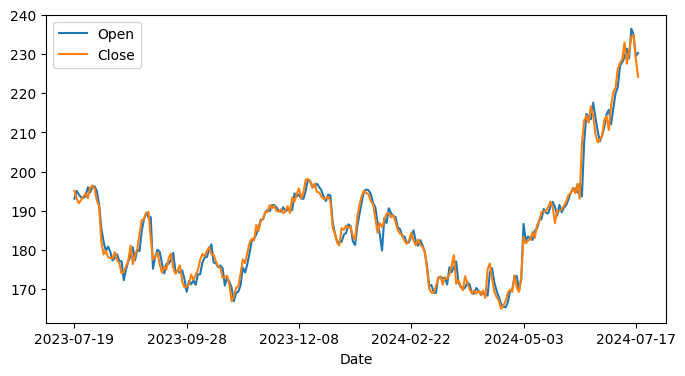

In [ ]:
# open, close를 한번에 plot하기
df.plot(x="Date", y=["Open", "Close"], figsize=(8,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

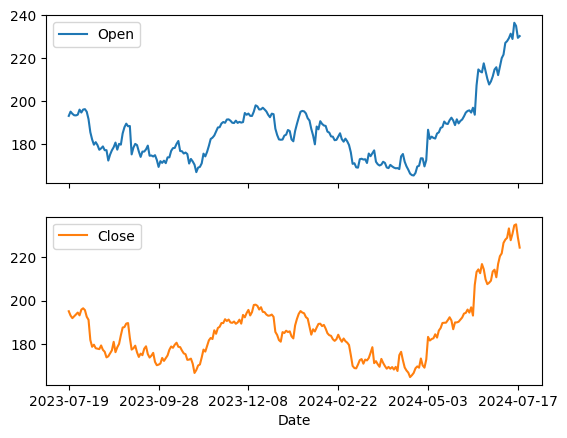

In [16]:
# 각 그래프를 여러 subplot에 나눠서 그리기
df.plot(x="Date", y=["Open", "Close"], subplots=True)

## (2) `Matplotlib`를 사용한 그래프 그리기
- `Matplotlib`는 파이썬에서 가장 널리 사용되는 데이터 시각화 라이브러리 중 하나입니다. 

### 1) `plt.subplots`
- plt.subplots 함수는 피겨(Figure)와 subplot의 축(Axes) 객체를 생성합니다.
    - Figure (fig):
        - Figure는 그래프의 '캔버스'라고 생각할 수 있으며, 그 위에 여러 개의 그래프(Axes)를 그릴 수 있습니다.
    - Axes (axes):
        - 실제 데이터가 표시되는 그래프 부분으로, 축(labels), 타이틀(title), 플롯(plot line) 등 그래프의 실제 요소를 포함합니다. 

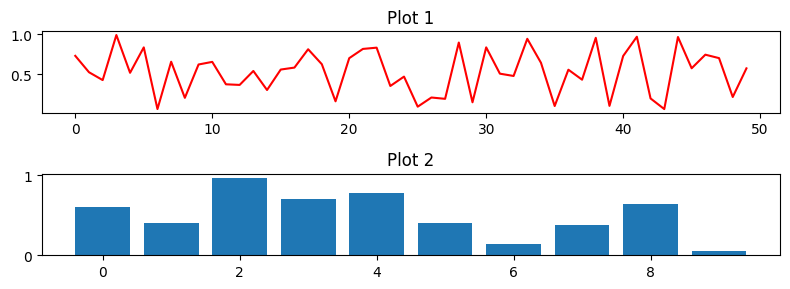

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 2x2 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3))

# 첫 번째 서브플롯 설정
ax1.plot(np.random.rand(50), color='red')
ax1.set_title('Plot 1')

# 두 번째 서브플롯 설정
ax2.bar(np.arange(10), np.random.rand(10))
ax2.set_title('Plot 2')

# 레이아웃 조정
plt.tight_layout()

# 피겨 표시
plt.show()

### (2) `matplotlib`를 활용해서 일봉 데이터 그래프 그리기

In [7]:
df = pd.read_csv("../dataset/yfinance_aapl.csv", index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-19,193.100006,198.229996,192.649994,195.100006,194.069351,80507300
1,2023-07-20,195.089996,196.470001,192.500000,193.130005,192.109756,59581200
2,2023-07-21,194.100006,194.970001,191.229996,191.940002,190.926041,71917800


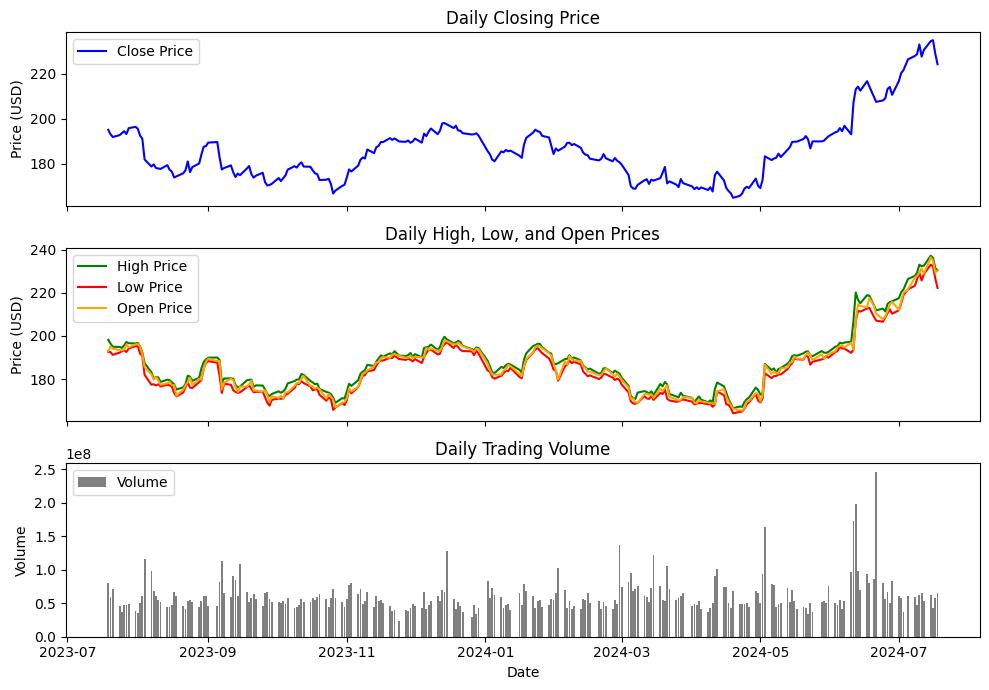

In [ ]:
import matplotlib.pyplot as plt


# subplot 생성
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

# 첫번째 그래프에 Close 그래프 그리기
ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue')
ax1.set_title('Daily Closing Price')
ax1.set_ylabel('Price (USD)')
ax1.legend()

# 두번째 그래프에 Open, High, Low 그래프 그리기
ax2.plot(df['Date'], df['High'], label='High Price', color='green')
ax2.plot(df['Date'], df['Low'], label='Low Price', color='red')
ax2.plot(df['Date'], df['Open'], label='Open Price', color='orange')
ax2.set_title('Daily High, Low, and Open Prices')
ax2.set_ylabel('Price (USD)')
ax2.legend()

# 세번째 그래프레 Volume 그래프 그리기
ax3.bar(df['Date'], df['Volume'], label='Volume', color='gray')
ax3.set_title('Daily Trading Volume')
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date')
ax3.legend()

# 레이아웃 조절
plt.tight_layout()

# plt.show()